In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install glove-python-binary



In [ ]:
import time
time_bruteforse={}
time_avg={}
time_std={}
time_var={}
time_avg_std_p={}
time_avg_std_m={}
time_avg_std_mul={}
time_avg_std_d={}
time_avg_std_c={}
time_median={}
time_rms={}
time_gmean={}
time_hrmean={}




In [ ]:
from zipfile import ZipFile 

# specifying the zip file name 
file_name = "talk.religion.misc.zip"

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
	# printing all the contents of the zip file 
	zip.printdir() 

	# extracting all the files 
	print('Extracting all the files now...') 
	zip.extractall() 
	print('Done!')

File Name                                             Modified             Size
talk.religion.misc/124146                      1999-12-09 01:01:52         1077
talk.religion.misc/176845                      1999-12-09 01:01:50         1578
talk.religion.misc/176846                      1999-12-09 01:01:50         1769
talk.religion.misc/176847                      1999-12-09 01:01:54          960
talk.religion.misc/176849                      1999-12-09 01:01:58         1662
talk.religion.misc/176850                      1999-12-09 01:01:54         1563
talk.religion.misc/176851                      1999-12-09 01:01:50         2472
talk.religion.misc/176852                      1999-12-09 01:01:54          937
talk.religion.misc/176853                      1999-12-09 01:01:52         1411
talk.religion.misc/176855                      1999-12-09 01:01:50          613
talk.religion.misc/176856                      1999-12-09 01:01:58         1068
talk.religion.misc/176857               

In [ ]:
import numpy as np
import os
import glob
import nltk
file=glob.glob('/content/talk.religion.misc/*')

#Preprocessing and generate Groundtruth

In [ ]:
def dummy_word(sen,k):
  while(len(sen)<k):
    sen.append('is')
  return sen

In [ ]:
import re
document=[]
from nltk.tokenize import sent_tokenize
input_docs=[]
#numper input documents you want to take
count_doc=1250
k=8
for f in file:
    if(len( input_docs)==count_doc):
      break
    doc=open(f,'r',encoding='utf-8',errors="ignore")
    doc=doc.read()
    doc=doc.split('\n')
    temp=[]

    for i in doc:
        if len(i)>1:
            # temp.append(i)
            i=re.sub('[!@#$%^&*()_++=:<>,.;?/\*1234567890||\"{}\[\]]',' ',i)
            i=i.split()
            # document.append(i)
            if len(i)>k:
              temp.append(i)
            # else:
            #   temp.append(dummy_word(i,k))

    if(len(temp)>0):
      input_docs.append(temp)
    

In [ ]:
import random
max_=0
for doc in input_docs:
    for seni  in range(len(doc)):
      if len(doc[seni])<8:
        doc[seni]=dummy_word(doc[seni],k)


In [ ]:
ground_truth={}
docs=[]
for doc in input_docs:
  docs.append(doc)
for i in range(count_doc):
  docs.append([])
for i in range(len(input_docs)):
  ground_truth[i]={}
for j in range(10):
  for i in range(len(input_docs),len(input_docs)+count_doc):
    rand_doc=random.randint(0,len(input_docs)-1)
    rand_sen=random.randint(0,len(docs[rand_doc])-1)
    docs[i].append(docs[rand_doc][rand_sen])
    try:
      ground_truth[rand_doc][rand_sen].append((i,len(docs[i])-1))
    except:
      ground_truth[rand_doc][rand_sen]=[]
      ground_truth[rand_doc][rand_sen].append((i,len(docs[i])-1))



# lot of input docs has same kind of lines
for d1 in range(len(input_docs)):
  for d2 in range(len(input_docs),len(docs)):
    for l1 in range(len(input_docs[d1])):
      for l2 in range(len(docs[d2])):
        if(input_docs[d1][l1]==docs[d2][l2]):
          if l1 not in ground_truth[d1]:
            ground_truth[d1][l1]=[]
          if (d2,l2) not in ground_truth[d1][l1]:
            ground_truth[d1][l1].append((d2,l2))



In [ ]:
for i in ground_truth.keys():
    temp=ground_truth[i]
    ground_truth[i]={k:temp[k] for k in sorted(temp.keys())}

In [ ]:
import json
# log_file=json.dumps(ground_truth)
with open("ground_truth_log_file.json", "w") as outfile:  
    json.dump(ground_truth, outfile) 

In [ ]:
with open("log_file.json", "w") as outfile:  
    json.dump(ground_truth, outfile) 

#BruteForce Method(String Comparision)

In [ ]:
start1 = time.time()
outfile_bf={i:{} for i in range(count_doc) }
for d1 in range(len(docs)):
  for d2 in range(len(docs)):
    if d1==d2:
      continue
    for l1 in range(len(docs[d1])):
      for l2 in range(len(docs[d2])):
          if docs[d1][l1]==docs[d2][l2] and d1<count_doc and d2>=count_doc  :
            # if d1 not in outfile_bf:
            #   outfile_bf[d1]={}
            try:
              outfile_bf[d1][l1].append((d2,l2))
            except:
              outfile_bf[d1][l1]=[]
              outfile_bf[d1][l1].append((d2,l2))
end1=time.time()
time_bruteforse[2*count_doc]=end1-start1         


#Modified

Sentence document Mapping

In [ ]:
start2=time.time()
import math
flag_=10
import statistics 
document=[] #it contains all the lines of all documents
sentence_doc_line={}#it stores the line number of document and its corresponding document number
for i in range(len(docs)):#docs contains all the documents
  doc=docs[i]
  for s in range(len(doc)):
    document.append(doc[s])
    l=len(document)-1
    sentence_doc_line[l]=(i,s)



In [ ]:
#importing the glove library
from glove import Corpus,Glove
# creating a corpus object
corpus = Corpus() 
length=100
#training the corpus to generate the co occurence matrix which is used in GloVe
corpus.fit(document, window=5)
#creating a Glove object which will use the matrix created in the above lines to create embeddings
#We can set the learning rate as it uses Gradient Descent and number of components
glove = Glove(no_components=length, learning_rate=0.05)
 
glove.fit(corpus.matrix, epochs=10, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.save('glove.model')

Performing 10 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9


In [ ]:
import statistics 
def sentence_vector_avg(sen):
  mean=[0 for i in range(length)]
  for word in sen:
        if(word not in glove.dictionary):
            continue
        glove_vec=glove.word_vectors[glove.dictionary[word]]
        for i in range(length):
            mean[i]+=(glove_vec[i]/len(sen))
  return mean

def sentence_vector_std(sen):
  std_=[[] for i in range(length)]
  for word in sen:
        if(word not in glove.dictionary):
            continue
        glove_vec=glove.word_vectors[glove.dictionary[word]]
        for i in range(length):
            std_[i].append(glove_vec[i])
  stdv__=[]
  for i in range(length):
        a=sum(std_[i])/len(sen)
        sum_=0
        for j in std_[i]:
            sum_+=((a-j)**2)
        sum_/=len(sen)
        stdv__.append(math.sqrt(sum_))

  return stdv__

def sentence_vector_var(sen):
    variance_=[[] for i in range(length)]
    for word in sen:
        if(word not in glove.dictionary):
            continue
        glove_vec=glove.word_vectors[glove.dictionary[word]]
        for i in range(length):
            variance_[i].append(glove_vec[i])
    variance__=[]
    for i in range(length):
        a=sum(variance_[i])/len(sen)
        sum_=0
        for j in variance_[i]:
            sum_+=((a-j)**2)
        variance__.append(sum_/len(sen))
    return variance__

def sentence_vector_avg_std_p(sen):
    sum1=[0 for i in range(length)]
    std_=[[] for i in range(length)]
    for word in sen:
        if(word not in glove.dictionary):
            continue
        glove_vec=glove.word_vectors[glove.dictionary[word]]
        for i in range(length):
            sum1[i]+=glove_vec[i]
            std_[i].append(glove_vec[i])
#         print(word)
#             print(variance_[i])
    for i in range(length):
        sum1[i]/=len(sen)
    for i in range(length):
        a=sum(std_[i])/len(sen)
        sum_=0
        for j in std_[i]:
            sum_+=((a-j)**2)
        sum_=math.sqrt(sum_/len(sen))
        sum1[i]+=sum_
    return sum1


def sentence_vector_avg_std_m(sen):
    sum1=[0 for i in range(length)]
    std_=[[] for i in range(length)]
    for word in sen:
        if(word not in glove.dictionary):
            continue
        glove_vec=glove.word_vectors[glove.dictionary[word]]
        for i in range(length):
            sum1[i]+=glove_vec[i]
            std_[i].append(glove_vec[i])
#         print(word)
#             print(variance_[i])
    for i in range(length):
        sum1[i]/=len(sen)
    for i in range(length):
        a=sum(std_[i])/len(sen)
        sum_=0
        for j in std_[i]:
            sum_+=((a-j)**2)
        sum_=math.sqrt(sum_/len(sen))
        sum1[i]-=sum_
    return sum1


def sentence_vector_avg_std_d(sen):
    sum1=[0 for i in range(length)]
    std_=[[] for i in range(length)]
    for word in sen:
        if(word not in glove.dictionary):
            continue
        glove_vec=glove.word_vectors[glove.dictionary[word]]
        for i in range(length):
            sum1[i]+=glove_vec[i]
            variance_[i].append(glove_vec[i])
#         print(word)
#             print(variance_[i])
    for i in range(length):
        sum1[i]/=len(sen)
    for i in range(length):
        a=sum(std_[i])/len(sen)
        sum_=0
        for j in variance_[i]:
            sum_+=((a-j)**2)
        sum_=math.sqrt(sum_/len(sen))
        sum1[i]/=sum_
    return sum1

def sentence_vector_avg_std_mul(sen):
    sum1=[0 for i in range(length)]
    std_=[[] for i in range(length)]
    for word in sen:
        if(word not in glove.dictionary):
            continue
        glove_vec=glove.word_vectors[glove.dictionary[word]]
        for i in range(length):
            sum1[i]+=glove_vec[i]
            std_[i].append(glove_vec[i])
#         print(word)
#             print(variance_[i])
    for i in range(length):
        sum1[i]/=len(sen)
    for i in range(length):
        a=sum(std_[i])/len(sen)
        sum_=0
        for j in std_[i]:
            sum_+=((a-j)**2)
        sum_=math.sqrt(sum_/len(sen))
        sum1[i]*=sum_
    return sum1

def sentence_vector_avg_std_c(sen):
    sum1=[0 for i in range(length)]
    variance_=[[] for i in range(length)]
    for word in sen:
        if(word not in glove.dictionary):
            continue
        glove_vec=glove.word_vectors[glove.dictionary[word]]
        for i in range(length):
            sum1[i]+=glove_vec[i]
            variance_[i].append(glove_vec[i])
#         print(word)
#             print(variance_[i])
    for i in range(length):
        sum1[i]/=len(sen)
    stdv__=[]
    for i in range(length):
        a=sum(variance_[i])/len(sen)
        sum_=0
        for j in variance_[i]:
            sum_+=((a-j)**2)/len(sen)
        stdv__.append(math.sqrt(sum_))
    return stdv__+sum1


def sentence_vector_median(sen):
  median=[[] for i in range(length)]
  for word in sen:
        if(word not in glove.dictionary):
            continue
        glove_vec=glove.word_vectors[glove.dictionary[word]]
        for i in range(length):
            median[i].append(glove_vec[i])
  median=np.array(median)
  median_=[]
  for i in range(length):
        median_.append(np.median(median[i]))
  return median_

def sentence_vector_rms(sen):
  rms=[0 for i in range(length)]
  for word in sen:
        if(word not in glove.dictionary):
            continue
        glove_vec=glove.word_vectors[glove.dictionary[word]]
        for i in range(length):
            rms[i]+=((glove_vec[i])**2)
  rms=np.array(rms)
  for i in range(length):
        rms[i]/=len(sen)
        rms[i]=math.sqrt(rms[i])
  return rms


def sentence_vector_gmean(sen):
  gm=[[] for i in range(length)]
  for word in sen:
        if(word not in glove.dictionary):
            continue
        glove_vec=glove.word_vectors[glove.dictionary[word]]
        for i in range(length):
            gm[i].append(glove_vec[i])
  gm=np.array(gm)
  gm_=[]
  for i in range(length):
    t=gmean(gm[i])
    if math.isnan(t):
        gm_.append(0)
    else:
      gm_.append(t)
  return gm_

# def sentence_vector_hmean(sen):
#   hm=[[] for i in range(length)]
#   for word in sen:
#         if(word not in glove.dictionary):
#             continue
#         glove_vec=glove.word_vectors[glove.dictionary[word]]
#         for i in range(length):
#             hm[i].append(glove_vec[i])
#   hm=np.array(hm)
#   hm_=[]
#   for i in range(length):
#     try:
#       t=hmean(hm[i])
#       if math.isnan(t):
#           hm_.append(0)
#       else:
#         hm_.append(t)
#   return hm_



In [ ]:
#1st split
split_1=[]
if flag_==1:
  for sen in document:
      sv=sentence_vector_avg(sen)
      split_1.append(sv)
elif flag_==2:
  for sen in document:
      sv=sentence_vector_std(sen)
      split_1.append(sv)
elif flag_==3:
  for sen in document:
      sv=sentence_vector_var(sen)
      split_1.append(sv)
elif flag_==4:
  for sen in document:
      sv=sentence_vector_avg_std_p(sen)
      split_1.append(sv)
elif flag_==5:
  for sen in document:
      sv=sentence_vector_avg_std_m(sen)
      split_1.append(sv)
# elif flag_==6:
#   for sen in document:
#       sv=sentence_vector_avg_std_mul(sen)
#       split_1.append(sv)
# elif flag_==5:
#   for sen in document:
#       sv=sentence_vector_avg_std_d(sen)
#       split_1.append(sv)
elif flag_==6:
  for sen in document:
      sv=sentence_vector_avg_std_c(sen)
      split_1.append(sv)
elif flag_==7:
  for sen in document:
      sv=sentence_vector_median(sen)
      split_1.append(sv)
elif flag_==8:
  for sen in document:
      sv=sentence_vector_rms(sen)
      split_1.append(sv)
elif flag_==9:
  from scipy.stats import gmean
  for sen in document:
      sv=sentence_vector_gmean(sen)
      split_1.append(sv)
else:
  # from scipy.stats import hmean
  for sen in document:
      sv=sentence_vector_avg_std_mul(sen)
      split_1.append(sv)



Clusturing

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial import distance
import numpy as np
x=np.array(split_1)
no_center=10
kmeans = KMeans(n_clusters=no_center, random_state=0).fit(x)
center=kmeans.cluster_centers_

In [ ]:
document_centroid={v:[] for v in range(no_center)}
temp_l=kmeans.labels_
for s in range(len(x)):
  d=distance.euclidean(x[s],center[temp_l[s]])
  document_centroid[temp_l[s]].append((d,s))

def first(n):
    return n[0]  
    
for c in document_centroid:
  document_centroid[c]=sorted(document_centroid[c],key=first)
  





In [ ]:
# u=[[] for i in range(20)]
# for i in range(len(temp_l)):
#   u[temp_l[i]].append(document[i])


# for l1 in range(len(u)):
#   l=u[l1]
#   for i in l:
#     c1=0
#     c2=0
#     d=0
#     for j in range(len(document)):
#       if document[j]==i:
#         d1=distance.euclidean(x[j],center[temp_l[j]])
#         if d==0:
#           d=d1
#         if d!=d1:
#           c2+=1
#     if c2!=0:
#       print(c2)       

Sentence Vector Comparision

In [ ]:
output_log={}
for i in range(count_doc):
  output_log[i]={}
for c in document_centroid:
  l=0
  while l <len(document_centroid[c]):
    h=l+1
    while (h<len(document_centroid[c]) and document_centroid[c][l][0]==document_centroid[c][h][0]):
      h+=1
    if (h>l+1):
      for s1 in range(l,h-1):
        for s2 in range(s1+1,h):
          d1,l1=sentence_doc_line[document_centroid[c][s1][1]]
          d2,l2=sentence_doc_line[document_centroid[c][s2][1]]
          
          if (d1< count_doc and d2>=count_doc):
            
            if (input_docs[d1][l1]==docs[d2][l2]):
                try:
                  output_log[d1][l1].append((d2,l2))
                except:
                  output_log[d1][l1]=[]
                  output_log[d1][l1].append((d2,l2))
    l=h

In [ ]:
import json
# output_log_file=json.dumps(output_log)
with open("ouput_log_file.json", "w") as outfile:  
    json.dump(output_log, outfile) 
end2=time.time()

In [ ]:
if flag_==1:
  time_avg[2*count_doc]=end2-start2
elif flag_==2:
  time_std[2*count_doc]=end2-start2
elif flag_==3:
  time_var[2*count_doc]=end2-start2
elif flag_==4:
  time_avg_std_p[2*count_doc]=end2-start2
elif flag_==5:
    time_avg_std_m[2*count_doc]=end2-start2
# elif flag_=4:
#     time_avg_std_mul[2*count_doc]=end2-start2
# elif flag_=4:
#   time_avg_std_d[2*count_doc]=end2-start2
elif flag_==6:
  time_avg_std_c[2*count_doc]=end2-start2
elif flag_==7:
  time_median[2*count_doc]=end2-start2
elif flag_==8:
  time_rms[2*count_doc]=end2-start2
elif flag_==9:
  time_gmean[2*count_doc]=end2-start2
else :
  time_avg_std_mul[2*count_doc]=end2-start2

#Graph

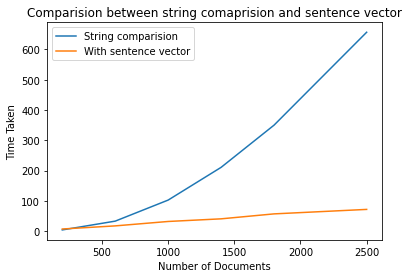

In [ ]:
#averag
import matplotlib.pyplot as plt
x = list(time_bruteforse.keys())
y1 = list(time_bruteforse.values())
plt. plot(x, y1, label = "String comparision")
y2 = list(time_avg.values())
plt. plot(x, y2, label = "With sentence vector")
plt. xlabel('Number of Documents')
plt.ylabel('Time Taken')
plt.title("Comparision between string comaprision and sentence vector")
plt.legend()

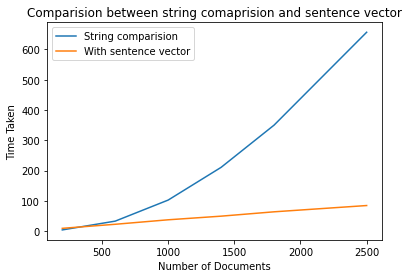

In [ ]:
#standard deviation
import matplotlib.pyplot as plt
x = list(time_bruteforse.keys())
y1 = list(time_bruteforse.values())
plt. plot(x, y1, label = "String comparision")
y2 = list(time_std.values())
plt. plot(x, y2, label = "With sentence vector")
plt. xlabel('Number of Documents')
plt.ylabel('Time Taken')
plt.title("Comparision between string comaprision and sentence vector")
plt.legend()

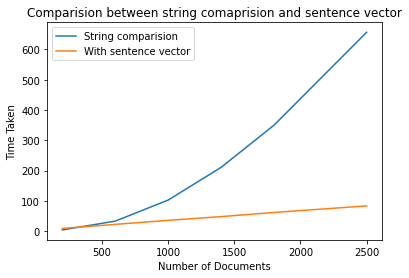

In [ ]:
#Varience
import matplotlib.pyplot as plt
x = list(time_bruteforse.keys())
y1 = list(time_bruteforse.values())
plt. plot(x, y1, label = "String comparision")
y2 = list(time_var.values())
plt. plot(x, y2, label = "With sentence vector")
plt. xlabel('Number of Documents')
plt.ylabel('Time Taken')
plt.title("Comparision between string comaprision and sentence vector")
plt.legend()

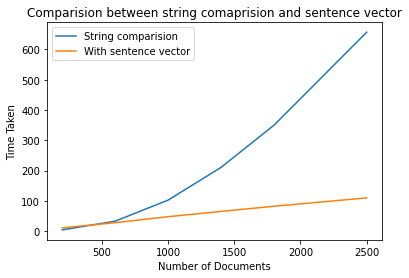

In [ ]:
#Avg+std
import matplotlib.pyplot as plt
x = list(time_bruteforse.keys())
y1 = list(time_bruteforse.values())
plt. plot(x, y1, label = "String comparision")
y2 = list(time_avg_std_p.values())
plt. plot(x, y2, label = "With sentence vector")
plt. xlabel('Number of Documents')
plt.ylabel('Time Taken')
plt.title("Comparision between string comaprision and sentence vector")
plt.legend()

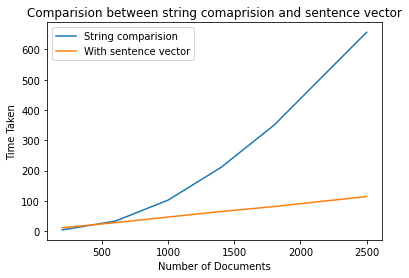

In [ ]:
#averag-varience
import matplotlib.pyplot as plt
x = list(time_bruteforse.keys())
y1 = list(time_bruteforse.values())
plt. plot(x, y1, label = "String comparision")
y2 = list(time_avg_std_m.values())
plt. plot(x, y2, label = "With sentence vector")
plt. xlabel('Number of Documents')
plt.ylabel('Time Taken')
plt.title("Comparision between string comaprision and sentence vector")
plt.legend()

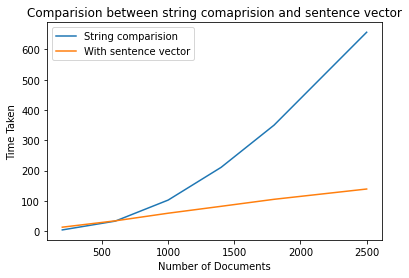

In [ ]:
#averag_varience concat
import matplotlib.pyplot as plt
x = list(time_bruteforse.keys())
y1 = list(time_bruteforse.values())
plt. plot(x, y1, label = "String comparision")
y2 = list(time_avg_std_c.values())
plt. plot(x, y2, label = "With sentence vector")
plt. xlabel('Number of Documents')
plt.ylabel('Time Taken')
plt.title("Comparision between string comaprision and sentence vector")
plt.legend()

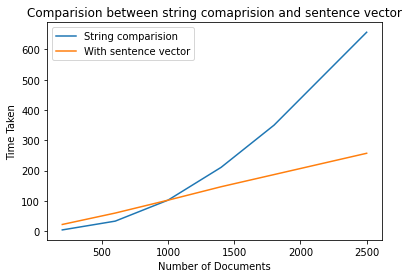

In [ ]:
#median
import matplotlib.pyplot as plt
x = list(time_bruteforse.keys())
y1 = list(time_bruteforse.values())
plt. plot(x, y1, label = "String comparision")
y2 = list(time_median.values())
plt. plot(x, y2, label = "With sentence vector")
plt. xlabel('Number of Documents')
plt.ylabel('Time Taken')
plt.title("Comparision between string comaprision and sentence vector")
plt.legend()

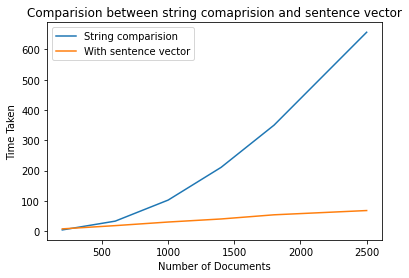

In [ ]:
#rms
import matplotlib.pyplot as plt
x = list(time_bruteforse.keys())
y1 = list(time_bruteforse.values())
plt. plot(x, y1, label = "String comparision")
y2 = list(time_rms.values())
plt. plot(x, y2, label = "With sentence vector")
plt. xlabel('Number of Documents')
plt.ylabel('Time Taken')
plt.title("Comparision between string comaprision and sentence vector")
plt.legend()

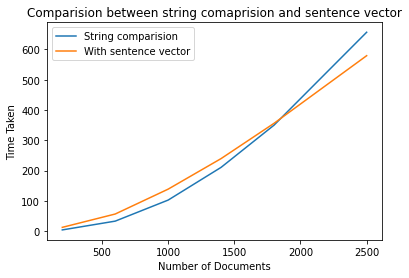

In [ ]:
#gmean
import matplotlib.pyplot as plt
x = list(time_bruteforse.keys())
y1 = list(time_bruteforse.values())
plt. plot(x, y1, label = "String comparision")
y2 = list(time_gmean.values())
plt. plot(x, y2, label = "With sentence vector")
plt. xlabel('Number of Documents')
plt.ylabel('Time Taken')
plt.title("Comparision between string comaprision and sentence vector")
plt.legend()

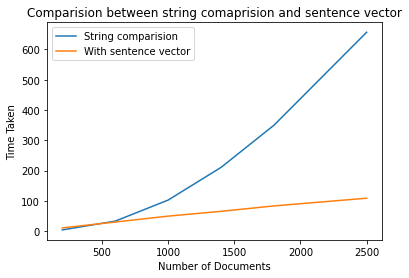

In [ ]:
#Averag*std
import matplotlib.pyplot as plt
x = list(time_bruteforse.keys())
y1 = list(time_bruteforse.values())
plt. plot(x, y1, label = "String comparision")
y2 = list(time_avg_std_mul.values())
plt. plot(x, y2, label = "With sentence vector")
plt. xlabel('Number of Documents')
plt.ylabel('Time Taken')
plt.title("Comparision between string comaprision and sentence vector")
plt.legend()

# store File

In [ ]:
import pickle
dbfile = open('time_avg', 'ab')
pickle.dump(time_avg, dbfile)                     
dbfile.close()
# dbfile = open('examplePickle', 'rb')     
# # db = pickle.load(dbfile)
# print(db)
dbfile = open('time_std', 'ab')
pickle.dump(time_std, dbfile)                     
dbfile.close()
dbfile = open('time_var', 'ab')
pickle.dump(time_var, dbfile)                     
dbfile.close()
dbfile = open('time_avg_std_p', 'ab')
pickle.dump(time_avg_std_p, dbfile)                     
dbfile.close()
dbfile = open('time_avg_std_m', 'ab')
pickle.dump(time_avg_std_m, dbfile)                     
dbfile.close()
dbfile = open('time_avg_std_c', 'ab')
pickle.dump(time_avg_std_c, dbfile)                     
dbfile.close()
dbfile = open('time_median', 'ab')
pickle.dump(time_median, dbfile)                     
dbfile.close()
dbfile = open('time_rms', 'ab')
pickle.dump(time_rms, dbfile)                     
dbfile.close()
dbfile = open('time_gm', 'ab')
pickle.dump(time_gmean, dbfile)                     
dbfile.close()
dbfile = open('time_avg_std_mul', 'ab')
pickle.dump(time_avg_std_mul, dbfile)                     
dbfile.close()
dbfile = open('time_bruteforse', 'ab')
pickle.dump(time_bruteforse, dbfile)                     
dbfile.close()
